---
CardioVascular Disease (CVD) analysis
Plantos Dan Stefan
---

# Descrizione dei dataset
1. *"Cardiovascular Disease"*, di **Aidan**, al [link](https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease), questo dataset consolida informazioni provenienti da due sorgenti primarie:
    1. [UCI Machine Learning Repository - Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)
    1. [Kaggle - Heart Disease Dataset by YasserH](https://www.kaggle.com/datasets/yasserh/heart-disease-dataset)
2. *"Cardiovascular Disease Dataset"*, di **Svetlana Ulianova**, al [link](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset), questo dataset consolida informazioni provenienti da visite svolte in un ospedale canadese di Toronto.

# Descrizione del dataset
|id|età|genere|altezza|peso|sistolica|diastolica|arteriosa|bmi|fumatore|colesterolo|glucosio|alcolista|sportivo|cardiopatico|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|int|int|boolean|int|int|int|int|string|int|boolean|string|string|boolean|boolean|boolean|

# Quesiti per l'analisi:
1. L'età influisce sulla probabilità di avere una malattia cardiovascolare?
1. La pressione arteriosa (sistolica e diastolica) ha un impatto rilevante sul rischio?
1. Quanto incide il fumo o il consumo di alcol?
1. Ci sono differenze di rischio tra uomini e donne?
1. Le persone attive fisicamente sono più protette?
1. Esistono correlazioni tra BMI e malattia?
1. Quali sono le variabili più predittive di una malattia cardiovascolare?
1. Un livello di colesterolo alto può influenzare il sorgere di una malattia cardiovascolare?
1. Un livello di glucosio alto può influenzare il sorgere di una malattia cardiovascolare?
1. Esiste una relazione tra colesterolo, glucosio e rischio di CHD?
1. Esiste una relazione tra fumo, colesterolo e causa di CVD?

In [ ]:
#--------------------------------------------------------
# Blood Pressure
# 0 = Normal
# 1 = Elevated
# 2 = Hypertension Stage 1
# 3 = Hypertension Stage 2

# Cholesterol and Glucose
# 1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'

# Sex
# 0: 'Femmina', 1: 'Maschio'
#--------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('data/dataset1.csv', encoding='utf8')
df2 = pd.read_csv('data/dataset2.csv', encoding='utf8', sep=';')

df = pd.concat([df1, df2], axis=0)
df = df.loc[:, ~df.T.duplicated()]
df['age_years'] = df['age'] / 365.25
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)

df.drop(columns=['age', 'height'], inplace=True)

df.rename(columns={
    'ap_hi': 'sistolica',
    'ap_lo': 'diastolica',
    'age_years': 'età',
    'height_m': 'altezza',
    'smoke': 'fumatore',
    'alco': 'alcolista',
    'cardio': 'cardiopatico',
    'gender': 'genere',
    'height': 'altezza',
    'weight': 'peso',
    'bp_category': 'arteriosa',
    'cholesterol': 'colesterolo',
    'gluc': 'glucosio',
    'active': 'sportivo'
}, inplace=True)

def classify_bp(row):
    if 120 <= row['sistolica'] < 130 and row['diastolica'] < 80:
        return 1
    elif row['sistolica'] >= 130 or row['diastolica'] >= 80:
        return 3
    elif row['sistolica'] >= 140 or row['diastolica'] >= 90:
        return 4
    else:
        return 0

df['arteriosa'] = df.apply(classify_bp, axis=1)

bp_order = [0, 1, 2, 3]
df['arteriosa'] = pd.Categorical(df['arteriosa'], categories=bp_order, ordered=True)
df = df.sort_values(by='arteriosa')

df.drop(columns=['id'], inplace=True)
df['id'] = range(1, len(df) + 1)

df = df[['id',
         'genere',
         'età',
         'altezza',
         'peso',
         'bmi',
         'colesterolo',
         'glucosio',
         'fumatore',
         'alcolista',
         'sportivo',
         'cardiopatico',
         'sistolica',
         'diastolica',
         'arteriosa'
        ]]

df['età'] = df['età'].astype(int)
df['peso'] = df['peso'].astype(int)
df['bmi'] = df['bmi'].round(3)
df['altezza'] = df['altezza'].round(2)
df['genere'] = df['genere'].map({1:0, 2:1})
df = df[(df['sistolica'] >= 80) & (df['sistolica'] <= 250) & (df['diastolica'] >= 50) & (df['diastolica'] <= 150)]

display(df)
df.to_csv('data/dataset.csv', encoding='utf8', sep=',', index=False)
print('Salvataggio del main file del progetto completato.')

## 1) Esiste una relazione tra fumo, colesterolo e causa di CVD?

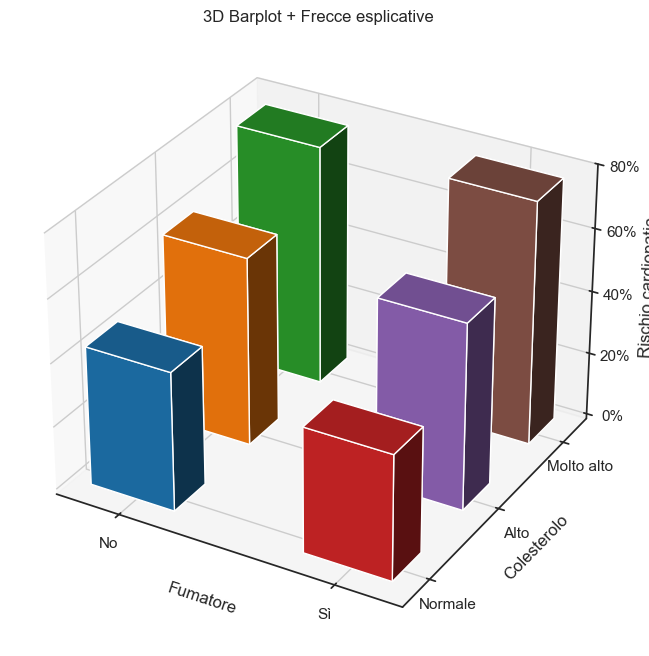

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('data/dataset.csv', encoding='utf8')
# Supponiamo che i dati siano già stati classificati
# 'colesterolo_cat' è una colonna con valori: "Normale", "Alto", "Molto alto"
data['colesterolo'] = pd.Categorical(data['colesterolo'], categories=[1, 2, 3], ordered=True)

# Calcolo % cardiopatici per fumatore + colesterolo
grouped = data.groupby(['fumatore', 'colesterolo'], observed=True)['cardiopatico'].mean().reset_index()
grouped['percentuale'] = grouped['cardiopatico'] * 100

# Trova indice barra (modifica in base al tuo dataframe grouped)
idx = grouped[(grouped['fumatore'] == 1) & (grouped['colesterolo'] == 2)].index[0]

# Coordinate delle barre
x_pos = grouped['fumatore'].astype(int).values
y_pos = grouped['colesterolo'].cat.codes.values
z_pos = np.zeros_like(x_pos)
dz = grouped['percentuale'].values
dx = dy = 0.4

# Coordinate barra
x0 = x_pos[idx]
y0 = y_pos[idx]
z0 = dz[idx]

# Colori distinti
cmap = plt.get_cmap('tab10')
colors = [cmap(i % 10) for i in range(len(dz))]

# Etichette per asse Y
y_labels = grouped['colesterolo'].cat.categories

# Plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Barre
for i in range(len(x_pos)):
    ax.bar3d(x_pos[i] - dx/2, y_pos[i] - dy/2, z_pos[i], dx, dy, dz[i], color=colors[i], shade=True)


dx, dy, dz_arrow = 0.1, 0.1, 10

# Etichette assi
ax.set_xlabel('Fumatore')
ax.set_ylabel('Colesterolo')

ax.set_zlabel('Rischio cardiopatia')
z_ticks = np.arange(0, grouped['percentuale'].max() + 10, 20)
ax.set_zticks(z_ticks)
ax.set_zticklabels([f"{int(z)}%" for z in z_ticks])

# Asse X e Y leggibili
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Sì'])
#ax.xticks([0, 1], ['No', 'Sì'])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Normale', 'Alto', 'Molto alto'])


plt.show()

## 2) L'età influisce sulla probabilità di avere una malattia cardiovascolare?

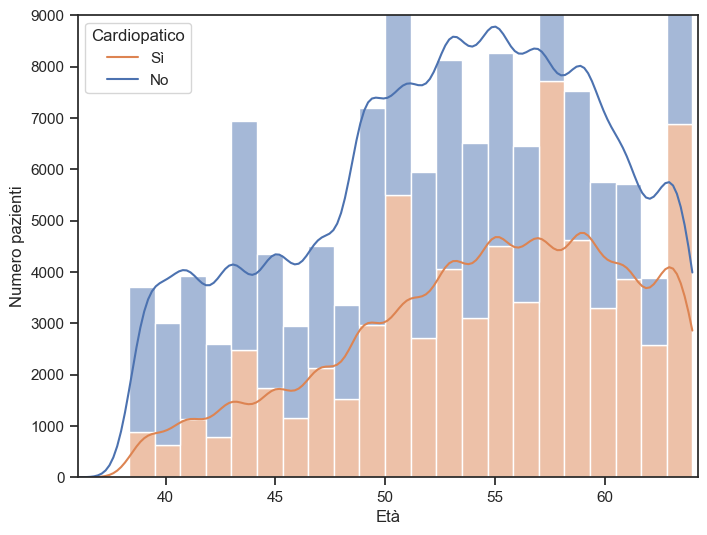

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/dataset.csv', encoding='utf8')

plt.figure(figsize=(8, 6))

sns.set_theme(style="ticks", palette="deep")
sns.histplot(data=data,
             x='età',
             hue='cardiopatico',
             kde=True,
             bins=30,
             multiple='stack'
            )
plt.legend(title='Cardiopatico',
           labels=['Sì', 'No'])
plt.xlabel('Età')
plt.xlim(36,64.25)
plt.ylim(0,9000)
plt.ylabel('Numero pazienti')
#plt.title('Distribuzione dell\'età rispetto alla presenza di cardiopatia')
plt.show()

## 3) La pressione arteriosa (sistolica e diastolica) ha un impatto rilevante sul rischio?

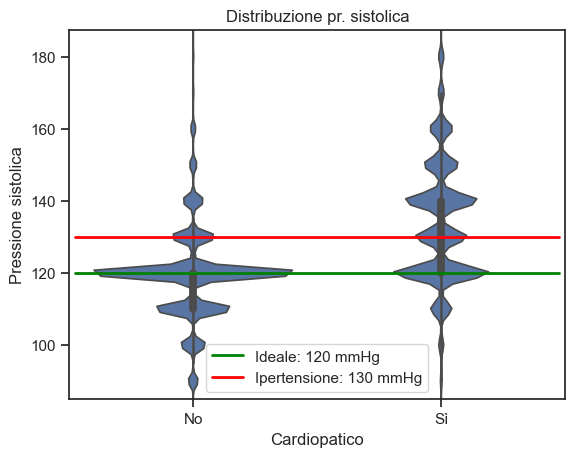

In [9]:
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="deep")
sns.violinplot(data=data,
               x='cardiopatico',
               y='sistolica')
plt.xlabel('Cardiopatico')
plt.xticks([0, 1], ['No', 'Sì'])
plt.ylabel('Pressione sistolica')
plt.title('Distribuzione pr. sistolica')
plt.axhline(y=120,
            xmax=0.9875,
            xmin=0.0125,
            color='green',
            linestyle='-',
            linewidth=2,
            label='Ideale: 120 mmHg')
plt.axhline(y=130,
            xmax=0.9875,
            xmin=0.0125,
            color='red',
            linestyle='-',
            linewidth=2,
            label='Ipertensione: 130 mmHg')
plt.ylim(85,187.5)
plt.legend()
plt.show()

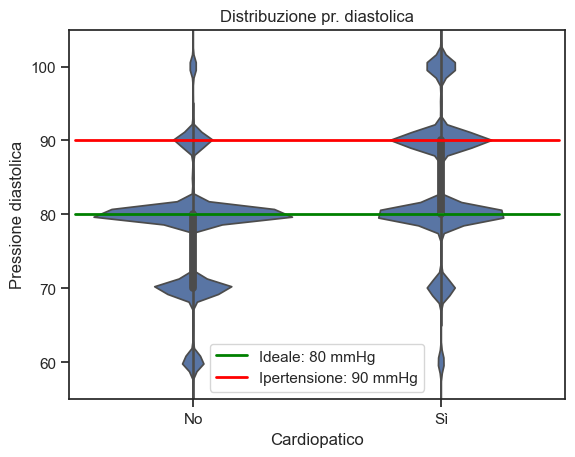

In [10]:
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="deep")
sns.violinplot(data=data, x='cardiopatico', y='diastolica')
plt.xlabel('Cardiopatico')
plt.xticks([0, 1], ['No', 'Sì'])
plt.ylabel('Pressione diastolica')
plt.title('Distribuzione pr. diastolica')
plt.axhline(y=80,
            xmax=0.9875,
            xmin=0.0125,
            color='green',
            linestyle='-',
            linewidth=2,
            label='Ideale: 80 mmHg')
plt.axhline(y=90,
            xmax=0.9875,
            xmin=0.0125,
            color='red',
            linestyle='-',
            linewidth=2,
            label='Ipertensione: 90 mmHg')
plt.ylim(55,105)
plt.legend()
plt.show()

In [11]:
# Calcolo pressione arteriosa media
data['arteriosa_numerica'] = (data['diastolica'] * 2 + data['sistolica']) / 3
data = data[data['arteriosa_numerica'] <= 250]

# Pulisci eventuali NaN
data = data.dropna(subset=['arteriosa_numerica', 'cardiopatico'])

# Se cardiopatico è boolean/string, converti in int
if data['cardiopatico'].dtype != 'int64':
    data['cardiopatico'] = data['cardiopatico'].astype('category').cat.codes

print('ok')

ok


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Imposta il tema
sns.set_theme(style="ticks", palette="deep")

# Crea il grafico
plt.figure(figsize=(10, 6))
sns.regplot(
    data=data, 
    x='arteriosa_numerica', 
    y='cardiopatico',
    logistic=True,
    ci=95,
    scatter_kws={'color': 'black', 'alpha': 0.25},  # punti sfumati
    line_kws={"color": "blue", "linewidth": 2}
)
plt.axhline(y=0.5,
            xmax=0.3675,
            xmin=0,
            color='red',
            linestyle='--',
            linewidth=2
           )
plt.axvline(x=96,
            ymax=0.5,
            ymin=0,
            color='red',
            linestyle='--',
            linewidth=2)
plt.annotate('Inizio rischio cardiopatia',
             xy=(96, 0.5), xycoords='data', xytext=(120, 0.6), textcoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='red'),
             bbox=dict(boxstyle="round, pad=0.3", edgecolor='black', facecolor='yellow'))
# Etichette e limiti
plt.xlabel('Pressione arteriosa')
plt.ylabel('Rischio Cardiopatia')
plt.xlim(58, 162)
plt.ylim(0, 1)
plt.yticks([i/4 for i in range(0, 4)], [f'{i*25}%' for i in range(0, 4)])
plt.grid(True, linestyle='-', alpha=1)
plt.tight_layout()
plt.show()


$$
\boxed{
PAM = \text{pressione diastolica} + \left( \frac{\text{pressione sistolica} - \text{pressione diastolica}}{3} \right)
}
$$

## 4) Quanto incide il fumo o il consumo di alcol (o entrambe)?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks", palette="deep")
ax = sns.countplot(data=data,
                   x='fumatore',
                   hue='cardiopatico',
                   width=0.6
                  )

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center',
                va='bottom',
                fontsize=12,
                color='black')
    
plt.xlabel('Cardiopatico')
plt.ylabel('Numero pazienti')
plt.xlim(-0.5,1.5)
plt.xticks([0, 1], ['No', 'Sì'])
plt.title('Influenza del Fumo sulla Malattia Cardiovascolare')
plt.legend(title='Fumatore', labels=['No', 'Sì'], loc="upper right", framealpha=1)
plt.show()

# Blu -> Non alcolici
# Rosso -> Alcolici



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Blu -> Non fumatori
# Rosso -> Fumatori
sns.set_theme(style="ticks", palette="deep")
bx = sns.countplot(data=data,
                   x='alcolista',
                   hue='cardiopatico',
                   width=0.6)

for p in bx.patches:
    height = p.get_height()
    bx.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center',
                va='bottom',
                fontsize=12,
                color='black')

plt.xlabel('Cardiopatico')
plt.xticks([0, 1], ['No', 'Sì'])
plt.ylabel('Numero pazienti')
plt.xlim(-0.5,1.5)
plt.title('Influenza del consumo di alcol sulla malattia cardiovascolare')
plt.legend(title='Alcolista', labels=['No', 'Sì'], loc="upper right", framealpha=1)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('data/dataset.csv', encoding='utf8')
data['fumatore_alcolista'] = (data['fumatore'] & data['alcolista']).astype(int)

plt.figure(figsize=(8, 5))
sns.set_theme(style="ticks", palette="deep")
cx = sns.countplot(data=data,
                   x='cardiopatico',
                   hue='fumatore_alcolista',
                   width=0.4)

for p in cx.patches:
    height = p.get_height()
    cx.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center',
                va='bottom',
                fontsize=12,
                color='black')

plt.xlabel('Cardiopatico')
plt.xticks([0, 1], ['No', 'Sì'])
plt.ylabel('Numero pazienti')
plt.title('Influenza del fumo e alcol su rischio di cardiopatia')
plt.legend(title='Fumatore e alcolista', labels=['No', 'Sì'], loc="upper right", framealpha=1)
plt.tight_layout()
plt.show()

## 5) Ci sono differenze di rischio tra uomini e donne?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="deep")
data['genere_testuale'] = data['genere'].map({0: 'Femmina', 1: 'Maschio'})

plt.figure(figsize=(8, 6))
sns.violinplot(data=data,
               x='genere_testuale',
               y='cardiopatico',
               hue='genere_testuale'
              )
plt.xlabel('Genere')
plt.xticks([0, 1], ['Femmina', 'Maschio'])
plt.ylabel('Cardiopatico')
plt.yticks([0, 1], ['No', 'Sì'])
#plt.title('Distribuzione cardiopatia per sesso')
plt.legend(title='Genere', labels=['Femmina', 'Maschio'], loc="center right")
plt.ylim(-0.15, 1.15)
plt.show()

## 6) Le persone attive fisicamente sono più protette?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('data/dataset.csv', encoding='utf8')
data_active = data[data['sportivo'] == 1]

sns.set_theme(style="ticks", palette="deep")
ax = sns.countplot(data=data_active,
                   x='cardiopatico',
                   hue='cardiopatico',
                   legend=False,
                   width=0.2)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center',
                va='bottom',
                fontsize=12,
                color='black')

plt.xlabel('Cardiopatico')
plt.ylabel('Numero pazienti attivi')
#plt.legend(title='Cadiopatico', labels=['No', 'Sì'], loc="upper right")
#plt.ylim(0,70000)
#plt.title('Persone Attive Fisicamente e Malattia Cardiovascolare')
plt.xticks([0, 1], ['No', 'Sì'])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_non_active = data[data['sportivo'] == 0]
sns.set_theme(style="ticks", palette="deep")
ax = sns.countplot(data=data_non_active,
                   x='cardiopatico',
                   hue='cardiopatico',
                   legend=False,
                   width=0.2)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center',
                va='bottom',
                fontsize=12,
                color='black')

plt.xlabel('Cardiopatico')
plt.ylabel('Numero pazienti NON attivi')
#plt.title('Persone Non Attive e Malattia Cardiovascolare')
plt.xticks([0, 1], ['No', 'Sì'])
plt.show()

## 7) Esistono correlazioni tra BMI e malattia cardiovascolare?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="deep")
g = sns.displot(data=data, x='bmi', hue='cardiopatico', bins=30, kde=True, height=6, aspect=1.5, legend=False)
plt.annotate('Non cardiopatici a rischio',
             xy=(24.25, 82500), xycoords='data', xytext=(30, 75000), textcoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='green'),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='yellow'))
plt.annotate('BMI critica',
             xy=(24.25, 61750), xycoords='data', xytext=(40, 60000), textcoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='red'),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='yellow'))
plt.xticks(range(5, 85, 5))
plt.yticks(range(0, 90000, 10000))
#plt.title('Distribuzione del BMI rispetto alla Malattia Cardiovascolare')
plt.xlim(10,60)
plt.xlabel('BMI')
plt.ylabel('Numero pazienti')
plt.ylim(0,85000)
plt.legend(title='Cardiopatico', labels=['Sì', 'No'])
plt.axvline(x=24.25,
            ymax=0.725,
            ymin=0,
            color='red',
            linestyle='--',
            linewidth=2,
           )
plt.axvline(x=24.25,
            ymax=0.9725,
            ymin=0.725,
            color='green',
            linestyle='--',
            linewidth=2,
           )
plt.axhline(y=61750,
            xmax=0.285,
            xmin=0,
            color='red',
            linestyle='--',
            linewidth=2,
           )
plt.axhline(y=82500,
            xmax=0.285,
            xmin=0,
            color='green',
            linestyle='--',
            linewidth=2,
           )
plt.show()

$$
\boxed{
BMI = \frac{\text{peso} \left( \text{kg} \right)}{\text{altezza}^2 \left( \text{m}^2 \right)}
}
$$

## 8) Quali sono le variabili più predittive di una malattia cardiovascolare?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd

data = pd.read_csv('data/dataset.csv', encoding='utf8')
df = pd.DataFrame(data)
X, y = data.drop(columns=['cardiopatico']), data['cardiopatico']
model = RandomForestClassifier(random_state=42).fit(X, y)
plt.figure(figsize=(12, 6))

sns.set_theme(style="whitegrid", palette="muted")
sns.barplot(y=X.columns,
            x=model.feature_importances_ * 100,
            hue=model.feature_importances_ * 100,
            legend=False)

plt.xlabel('Importanza')
plt.ylabel('Variabili')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()

## 9) Un livello di colesterolo alto può influenzare il sorgere di una malattia cardiovascolare?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/dataset.csv', encoding='utf8')
sns.set_theme(style="ticks", palette="deep")
g = sns.displot(data=data,
                x='colesterolo',
                hue='cardiopatico',
                discrete=True,
                legend=False,
                multiple='dodge',
                bins=3)
plt.xticks([1, 2, 3], ['Normale', 'Alto', 'Molto alto'])
g.set_axis_labels('Lvl. colesterolo', 'Numero pazienti')
#plt.title('Distribuzione delle Persone con e senza Malattie Cardiovascolari per Colesterolo')
plt.ylim(0,17500)
plt.legend(title='Cardiopatico', labels=['Sì', 'No'])
plt.xticks(rotation=45)
plt.show()

## 10) Un livello di glucosio alto può influenzare il sorgere di una malattia cardiovascolare?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="deep")
g = sns.displot(data=data,
                x='glucosio',
                hue='cardiopatico',
                discrete=True,
                legend=False,
                multiple='dodge',
                bins=3
               )
plt.xticks([1, 2, 3], ['Normale', 'Alto', 'Molto alto'])
g.set_axis_labels('Lvl. glucosio', 'Numero pazienti')
plt.xticks(rotation=45)
plt.ylim(0,17500)
plt.legend(title='Cardiopatico', labels=['Sì', 'No'])
plt.show()

## 11) Esiste una relazione tra colesterolo, glucosio e rischio di CHD?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/dataset.csv', encoding='utf8')

sns.set_theme(style="whitegrid", palette="muted")
g = sns.lmplot(data=data,
               x='colesterolo',
               y='glucosio',
               hue='cardiopatico',
               legend=True
              )
plt.axvline(x=3,
            ymax=0.5,
            ymin=0.4125,
            color='red',
            linestyle='--',
            linewidth=2
           )
plt.axhline(y=2,
            xmax=0.955,
            xmin=0.5,
            color='red',
            linestyle='--',
            linewidth=2
           )
plt.axvline(x=3,
            ymax=0.4,
            ymin=0.2,
            color='green',
            linestyle='--',
            linewidth=2
           )
plt.axhline(y=1.8,
            xmax=0.955,
            xmin=0.5,
            color='green',
            linestyle='--',
            linewidth=2
           )
#plt.xticks(range(0,4,1))
#plt.yticks(range(1,4,1))

#plt.title('Relazione tra Colesterolo, Glucosio e Rischio di Malattia Coronarica (CHD)')
plt.xlabel('Colesterolo')
plt.xticks([1, 2, 3], ['Normale', 'Alto', 'Molto alto'])
plt.yticks([1, 2, 3], ['Normale', 'Alto', 'Molto alto'])
plt.ylabel('Glucosio')
g._legend.set_title("Cardiopatico")
g._legend.texts[0].set_text("No")
g._legend.texts[1].set_text("Sì")
plt.show()

# Cholesterol and Glucose
# 1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'

# Conclusioni
1. Fumo e alcol
    * Lieve associazione tra fumo e consumo di alcol nel sorgere di cardiopatie.
3. Sesso biologico
    * Rischio di cardiopatie tendenzialmente più alta nei maschi.
5. Attività fisica
    * Molti cardiopatici sono fisicamente attivi.
    * L'inattività è più comune tra i cardiopatici rispetto ai sani.
    * L'attività fisica non annulla il rischio e l'inattività lo amplifica.
7. Indice di massa corporea (BMI)
    * Correlazione positiva tra BMI e rischio di cardiopatie.
9. Colesterolo e glicemia
    * Forte associazione tra ipercolesterolemia, iperglicemia e rischio di cardiopatie.
    * Glucosio troppo basso o troppo alto è un fattore critico.
11. Fattori combinati
    * La **concomitanza** dei fattori (fumo, alcol, inattività, glucosio, ecc.) aumenta **esponenzialmente** il rischio di cardiopatia.